# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
%matplotlib inline

In [3]:
import json
from pprint import pprint
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# OpenWeather kept locking me out, import time to slow api retrieves
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set variansts for Record and Set Counts and Page Breaks
record_count = 0
set_count = 1
pg_break =  "-" * 55

# Perform a weather check on each city using a series of successive API calls
# Print log of each city as it'sbeing processed (with the city number and city name)
print('Beginning Data Retrieval')
print(pg_break)

# Setup For Loop
for city in cities:
    query_params = {
        'appid': weather_api_key,
        'q': city
    }
# Setup Record Count and Error Handler
    try:
        record_count += 1
        weather_response = requests.get(url, params=query_params)
        weather_json = weather_response.json()

        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {weather_json['name']}")
            time.sleep(0.25)
        else:
            record_count = 1
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {weather_json['name']}")
            record_count += 1
    except:
        print(f"Record {record_count} of Set {set_count} | {city}, Not Found. Skipping...")

# Print Results to Display
print(pg_break)
print("Data Retrieval Complete")
print(pg_break)

Beginning Data Retrieval
-------------------------------------------------------
Processing Record 1 of Set 1 | Hermanus
Processing Record 2 of Set 1 | Punta Arenas
Processing Record 3 of Set 1 | Hobart
Processing Record 4 of Set 1 | Klaksvík
Processing Record 5 of Set 1 | Alta Floresta
Processing Record 6 of Set 1 | Mattru
Record 7 of Set 1 | umzimvubu, Not Found. Skipping...
Processing Record 8 of Set 1 | Lata
Record 9 of Set 1 | mys shmidta, Not Found. Skipping...
Processing Record 10 of Set 1 | Arraial do Cabo
Processing Record 11 of Set 1 | Khatanga
Processing Record 12 of Set 1 | Muros
Processing Record 13 of Set 1 | Ribeira Grande
Processing Record 14 of Set 1 | Berlevåg
Processing Record 15 of Set 1 | Rikitea
Processing Record 16 of Set 1 | Isangel
Processing Record 17 of Set 1 | Palmer
Processing Record 18 of Set 1 | Yellowknife
Processing Record 19 of Set 1 | Krutikha
Processing Record 20 of Set 1 | Bredasdorp
Record 21 of Set 1 | kamenskoye, Not Found. Skipping...
Processing

Record 43 of Set 4 | tsihombe, Not Found. Skipping...
Processing Record 44 of Set 4 | Fortuna
Processing Record 45 of Set 4 | Gravelbourg
Processing Record 46 of Set 4 | São Filipe
Processing Record 47 of Set 4 | Bac Giang
Processing Record 48 of Set 4 | Gagino
Processing Record 49 of Set 4 | Talnakh
Processing Record 50 of Set 4 | Cidreira
Processing Record 1 of Set 5 | Vardø
Processing Record 3 of Set 5 | Jequié
Processing Record 4 of Set 5 | Marzuq
Processing Record 5 of Set 5 | Taltal
Processing Record 6 of Set 5 | Sørland
Processing Record 7 of Set 5 | Mar del Plata
Processing Record 8 of Set 5 | Chernyshevsk
Processing Record 9 of Set 5 | Xinqing
Record 10 of Set 5 | toliary, Not Found. Skipping...
Processing Record 11 of Set 5 | Lompoc
Processing Record 12 of Set 5 | Morro Bay
Processing Record 13 of Set 5 | Sarkand
Processing Record 14 of Set 5 | Dūngarpur
Processing Record 15 of Set 5 | Oodweyne
Processing Record 16 of Set 5 | Hofn
Processing Record 17 of Set 5 | Amapá
Record 

Processing Record 42 of Set 8 | Boende
Processing Record 43 of Set 8 | Gobabis
Processing Record 44 of Set 8 | Natal
Processing Record 45 of Set 8 | Areosa
Processing Record 46 of Set 8 | College
Processing Record 47 of Set 8 | Shāhābād
Processing Record 48 of Set 8 | Singaparna
Record 49 of Set 8 | aflu, Not Found. Skipping...
Processing Record 50 of Set 8 | Teahupoo
Processing Record 1 of Set 9 | Raudeberg
Processing Record 3 of Set 9 | Mayo
Processing Record 4 of Set 9 | Narsaq
Processing Record 5 of Set 9 | Teguise
Processing Record 6 of Set 9 | Edgewater
Processing Record 7 of Set 9 | Nyurba
Processing Record 8 of Set 9 | Harper
Processing Record 9 of Set 9 | Zhigansk
Processing Record 10 of Set 9 | San Jose
Processing Record 11 of Set 9 | Belmonte
Processing Record 12 of Set 9 | Três Passos
Processing Record 13 of Set 9 | Vanavara
Processing Record 14 of Set 9 | Muroto-misakicho
Processing Record 15 of Set 9 | Shar
Processing Record 16 of Set 9 | Maltahöhe
Processing Record 17 of

Processing Record 35 of Set 12 | Pandan
Processing Record 36 of Set 12 | Sioux Lookout
Processing Record 37 of Set 12 | Colima
Processing Record 38 of Set 12 | Skjervøy
Processing Record 39 of Set 12 | Hobyo
Record 40 of Set 12 | halalo, Not Found. Skipping...
Processing Record 41 of Set 12 | Ostrovnoy
Processing Record 42 of Set 12 | Honiara
Processing Record 43 of Set 12 | Kitob
Processing Record 44 of Set 12 | Jacaraú
Processing Record 45 of Set 12 | Usinsk
Record 46 of Set 12 | jabiru, Not Found. Skipping...
Processing Record 47 of Set 12 | La Ronge
Processing Record 48 of Set 12 | Taft
Processing Record 49 of Set 12 | Skalat
Record 50 of Set 12 | urdzhar, Not Found. Skipping...
Processing Record 1 of Set 13 | Marrakesh
Processing Record 3 of Set 13 | Warmbad
Processing Record 4 of Set 13 | Dalnegorsk
Processing Record 5 of Set 13 | Kholm
Processing Record 6 of Set 13 | Vila
Processing Record 7 of Set 13 | Walvis Bay
Processing Record 8 of Set 13 | Hwange
Record 9 of Set 13 | zabol

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create empty list for city data
city_data = []

# Create Dictionary with For Loop
for city in cities:
    query_params = {
        'appid': weather_api_key,
        'q': city,
        'units': units
    }
# Pull data from json, append data to list and setup error handlers
    try:
        weather_response = requests.get(url, params=query_params)
        weather_json = weather_response.json()
        time.sleep(0.25)
        
        city_data.append(
            {
                'City': weather_json['name'],
                'Lat': weather_json['coord']['lat'],
                'Lng': weather_json['coord']['lon'],
                'Max Temp °F': weather_json['main']['temp_max'],
                'Humidity': weather_json['main']['humidity'],
                'Cloudiness': weather_json['clouds']['all'],
                'Wind Speed': weather_json['wind']['speed'],
                'Country': weather_json['sys']['country'],
                'Date': weather_json['dt']
            }
        )

    except:
        pass
# Set DataFrame, Output to screen and csv file
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv('Weather_Output/City_Data.csv', index=False, header=True)
city_data_df

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,60.01,87,50,8.68,ZA,1603597697
1,Punta Arenas,-53.15,-70.92,41.00,100,90,9.17,CL,1603597596
2,Hobart,-42.88,147.33,60.01,48,75,17.22,AU,1603597694
3,Klaksvík,62.23,-6.59,44.60,93,99,17.22,FO,1603597702
4,Alta Floresta,-9.88,-56.09,70.90,95,100,0.74,BR,1603597459
...,...,...,...,...,...,...,...,...,...
557,Yuanping,38.72,112.76,63.14,29,0,3.40,CN,1603597925
558,Cochrane,51.18,-114.47,3.99,84,20,6.93,CA,1603597926
559,Sooke,48.37,-123.73,39.99,59,0,1.99,CA,1603597926
560,Dicabisagan,17.08,122.42,80.38,85,100,7.09,PH,1603597673


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Display overview of dataframe for review
city_data_df.describe()

,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,22.328345,14.319680,58.249199,74.391459,55.749110,7.750730,1.603598e+09
std,33.088482,89.414048,20.852194,20.072413,38.797836,5.498242,1.242100e+02
min,-54.800000,-179.170000,3.990000,13.000000,0.000000,0.090000,1.603597e+09
25%,-6.287500,-65.050000,43.307500,63.250000,18.000000,3.360000,1.603598e+09
50%,28.580000,19.100000,62.575000,79.000000,69.000000,6.555000,1.603598e+09
75%,50.327500,91.285000,76.367500,90.000000,93.750000,10.290000,1.603598e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,27.940000,1.603598e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
# Skipped this step, no cities had humidity over 100%
city_data_df.loc[city_data_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Identify the Outliers for Humidity
quartiles = city_data_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {round(lowerq,2)}")
print(f"The upper quartile of Humidity is: {round(upperq,2)}")
print(f"The interquartile range of Humidity is: {round(iqr,4)}")
print(f"The median of Humidity is: {round(quartiles[0.5],4)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile of Humidity is: 63.25
The upper quartile of Humidity is: 90.0
The interquartile range of Humidity is: 26.75
The median of Humidity is: 79.0 
Values below 23.12 could be outliers.
Values above 130.12 could be outliers.


In [12]:
# Display outliers
city_data_df.loc[(city_data_df['Humidity'] < lower_bound) | (city_data_df['Humidity'] > upper_bound)]

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date
92,Yulara,-25.24,130.99,75.20,23,0,10.29,AU,1603597491
181,Marzuq,14.40,46.47,68.81,22,0,2.17,YE,1603597774
212,Dabwāli,29.95,74.73,82.54,15,0,7.72,IN,1603597786
253,Geraldton,-28.77,114.60,96.80,13,0,16.11,AU,1603597696
254,Taoudenni,22.68,-3.98,84.09,14,6,15.48,ML,1603597557
256,Tucson,32.22,-110.93,77.00,23,1,3.36,US,1603597770
341,Sakakah,29.97,40.21,62.60,21,0,4.70,SA,1603597837
434,Jumla,29.27,82.18,64.15,23,0,2.42,NP,1603597875
489,Goundam,16.41,-3.67,82.13,13,43,10.38,ML,1603597897


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.loc[(city_data_df['Humidity'] >= lower_bound) &
                                  (city_data_df['Humidity'] <= upper_bound)]
clean_city_data

,City,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,60.01,87,50,8.68,ZA,1603597697
1,Punta Arenas,-53.15,-70.92,41.00,100,90,9.17,CL,1603597596
2,Hobart,-42.88,147.33,60.01,48,75,17.22,AU,1603597694
3,Klaksvík,62.23,-6.59,44.60,93,99,17.22,FO,1603597702
4,Alta Floresta,-9.88,-56.09,70.90,95,100,0.74,BR,1603597459
...,...,...,...,...,...,...,...,...,...
557,Yuanping,38.72,112.76,63.14,29,0,3.40,CN,1603597925
558,Cochrane,51.18,-114.47,3.99,84,20,6.93,CA,1603597926
559,Sooke,48.37,-123.73,39.99,59,0,1.99,CA,1603597926
560,Dicabisagan,17.08,122.42,80.38,85,100,7.09,PH,1603597673


In [14]:
clean_city_data.describe()

,Lat,Lng,Max Temp °F,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,22.473128,13.882568,57.943454,75.300181,56.566004,7.745533,1.603598e+09
std,33.214378,89.635383,20.841035,18.907679,38.537715,5.504982,1.241006e+02
min,-54.800000,-179.170000,3.990000,24.000000,0.000000,0.090000,1.603597e+09
25%,-6.340000,-65.300000,43.050000,65.000000,20.000000,3.360000,1.603598e+09
50%,28.660000,18.730000,62.100000,80.000000,72.000000,6.530000,1.603598e+09
75%,50.700000,91.640000,76.030000,91.000000,94.000000,10.290000,1.603598e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,27.940000,1.603598e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

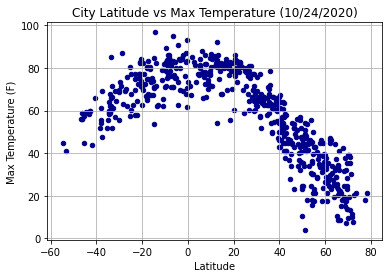

In [15]:
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp °F', c='DarkBlue')
plt.title('City Latitude vs Max Temperature (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

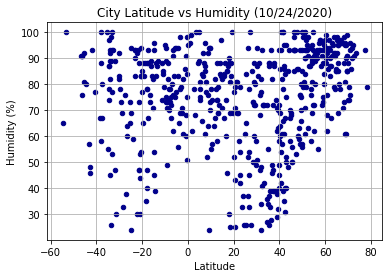

In [16]:
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity', c='DarkBlue')
plt.title('City Latitude vs Humidity (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

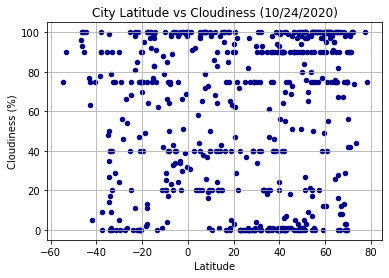

In [17]:
clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness', c='DarkBlue')
plt.title('City Latitude vs Cloudiness (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

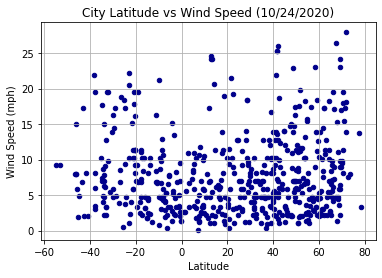

In [18]:
clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed', c='DarkBlue')
plt.title('City Latitude vs Wind Speed (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9010063319396223


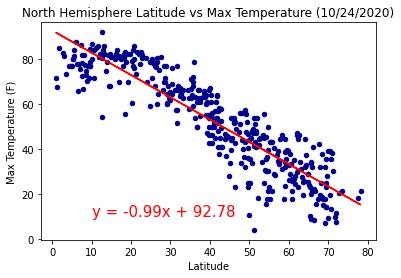

In [19]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_temp = NHemisphere_city_data_df['Max Temp °F']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_temp)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Max Temp °F', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Max Temperature (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7085115250553004


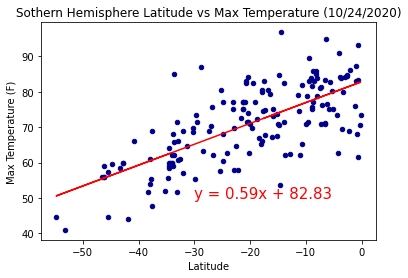

In [20]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_temp = SHemisphere_city_data_df['Max Temp °F']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_temp)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Max Temp °F', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Max Temperature (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2907681795517014


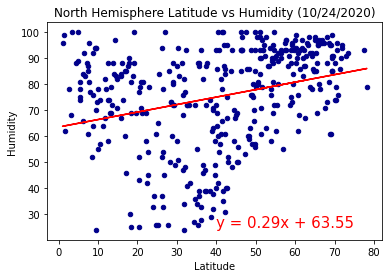

In [21]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_humidity = NHemisphere_city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_humidity)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Humidity', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Humidity (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.026659533708781172


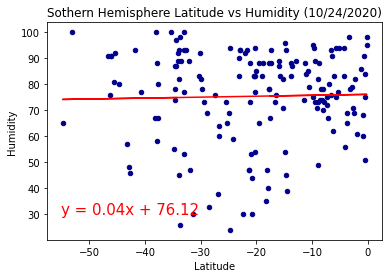

In [32]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_humidity = SHemisphere_city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_humidity)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Humidity', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Humidity (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15901247045252792


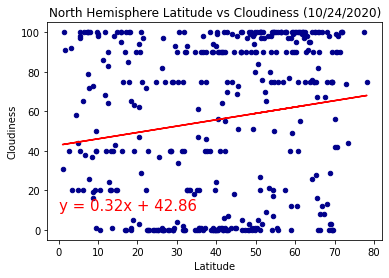

In [29]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_cloud = NHemisphere_city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_cloud)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Cloudiness', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Cloudiness (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05556114625623637


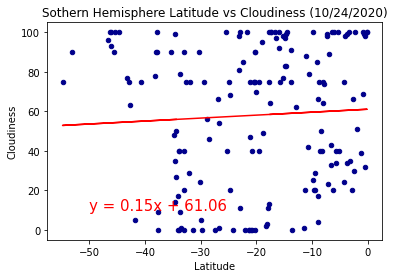

In [24]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_cloud = SHemisphere_city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_cloud)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Cloudiness', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Cloudiness (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17199572919787895


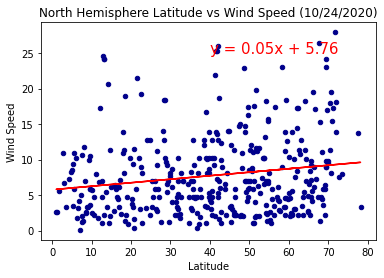

In [25]:
NHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']>=0) & (city_data_df['Lat']<=90)]

x_values_lat = NHemisphere_city_data_df['Lat']
y_values_wind = NHemisphere_city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_wind)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Wind Speed', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title('North Hemisphere Latitude vs Wind Speed (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23753814331591538


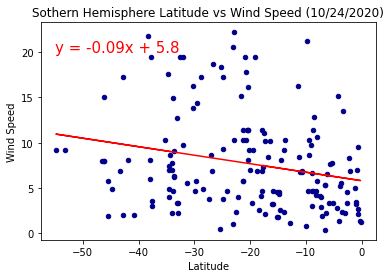

In [28]:
SHemisphere_city_data_df = clean_city_data.loc[(city_data_df['Lat']<0) & (city_data_df['Lat']>=-90)]

x_values_lat = SHemisphere_city_data_df['Lat']
y_values_wind = SHemisphere_city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lat, y_values_wind)

regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SHemisphere_city_data_df.plot(kind='scatter', x = 'Lat', y = 'Wind Speed', c='DarkBlue')
plt.plot(x_values_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Sothern Hemisphere Latitude vs Wind Speed (10/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()